In [93]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

$\textbf{MWA GLEAM Catalogue}$


Paper reference : https://arxiv.org/abs/1610.08318

Data download : https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VIII/100/gleamegc

In [3]:
fitsfile = fits.open('GLEAM_EGC_v2.fits')

$\textbf{Pandas DataFrame Tutorial}$


https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#question2

In [4]:
d = fitsfile[1].data
df = pd.DataFrame(data=d)

#Remove NaN rows

df2 = df.dropna()


In [13]:
column_names = df2.columns.values

column_names

array(['Name', 'background_wide', 'local_rms_wide', 'ra_str', 'dec_str',
       'RAJ2000', 'err_RAJ2000', 'DEJ2000', 'err_DEJ2000',
       'peak_flux_wide', 'err_peak_flux_wide', 'int_flux_wide',
       'err_int_flux_wide', 'a_wide', 'err_a_wide', 'b_wide',
       'err_b_wide', 'pa_wide', 'err_pa_wide', 'residual_mean_wide',
       'residual_std_wide', 'err_abs_flux_pct', 'err_fit_flux_pct',
       'psf_a_wide', 'psf_b_wide', 'psf_pa_wide', 'background_076',
       'local_rms_076', 'peak_flux_076', 'err_peak_flux_076',
       'int_flux_076', 'err_int_flux_076', 'a_076', 'b_076', 'pa_076',
       'residual_mean_076', 'residual_std_076', 'psf_a_076', 'psf_b_076',
       'psf_pa_076', 'background_084', 'local_rms_084', 'peak_flux_084',
       'err_peak_flux_084', 'int_flux_084', 'err_int_flux_084', 'a_084',
       'b_084', 'pa_084', 'residual_mean_084', 'residual_std_084',
       'psf_a_084', 'psf_b_084', 'psf_pa_084', 'background_092',
       'local_rms_092', 'peak_flux_092', 'err_peak_f

In [52]:
freq = np.array([76.0,84.0,92.0,99,107,115,122,130,143,151,158,166,174,181,189,204,212,220,227])
freq.size

19

In [14]:
#Selecting Column for data analysis
#Names, Sky Coordinates, Integrated Flux and Error for all frequency bands, spectral indeces

column_values_to_remove =['background_wide', 'local_rms_wide', 'ra_str', 'dec_str',
       'peak_flux_wide', 'err_peak_flux_wide', 'a_wide', 'err_a_wide', 'b_wide',
       'err_b_wide', 'pa_wide', 'err_pa_wide', 'residual_mean_wide',
       'residual_std_wide', 'err_abs_flux_pct', 'err_fit_flux_pct',
       'psf_a_wide', 'psf_b_wide', 'psf_pa_wide', 'background_076',
       'local_rms_076', 'peak_flux_076', 'err_peak_flux_076', 'a_076', 'b_076', 'pa_076',
       'residual_mean_076', 'residual_std_076', 'psf_a_076', 'psf_b_076',
       'psf_pa_076', 'background_084', 'local_rms_084', 'peak_flux_084',
       'err_peak_flux_084', 'a_084','b_084', 'pa_084', 'residual_mean_084', 'residual_std_084',
       'psf_a_084', 'psf_b_084', 'psf_pa_084', 'background_092',
       'local_rms_092', 'peak_flux_092', 'err_peak_flux_092', 'a_092', 'b_092', 'pa_092',
       'residual_mean_092', 'residual_std_092', 'psf_a_092', 'psf_b_092',
       'psf_pa_092', 'background_099', 'local_rms_099', 'peak_flux_099',
       'err_peak_flux_099', 'a_099','b_099', 'pa_099', 'residual_mean_099', 'residual_std_099',
       'psf_a_099', 'psf_b_099', 'psf_pa_099', 'background_107',
       'local_rms_107', 'peak_flux_107', 'err_peak_flux_107', 'a_107', 'b_107', 'pa_107',
       'residual_mean_107', 'residual_std_107', 'psf_a_107', 'psf_b_107',
       'psf_pa_107', 'background_115', 'local_rms_115', 'peak_flux_115',
       'err_peak_flux_115', 'a_115',
       'b_115', 'pa_115', 'residual_mean_115', 'residual_std_115',
       'psf_a_115', 'psf_b_115', 'psf_pa_115', 'background_122',
       'local_rms_122', 'peak_flux_122', 'err_peak_flux_122', 'a_122', 'b_122', 'pa_122',
       'residual_mean_122', 'residual_std_122', 'psf_a_122', 'psf_b_122',
       'psf_pa_122', 'background_130', 'local_rms_130', 'peak_flux_130',
       'err_peak_flux_130', 'a_130',
       'b_130', 'pa_130', 'residual_mean_130', 'residual_std_130',
       'psf_a_130', 'psf_b_130', 'psf_pa_130', 'background_143',
       'local_rms_143', 'peak_flux_143', 'err_peak_flux_143', 'a_143', 'b_143', 'pa_143',
       'residual_mean_143', 'residual_std_143', 'psf_a_143', 'psf_b_143',
       'psf_pa_143', 'background_151', 'local_rms_151', 'peak_flux_151',
       'err_peak_flux_151', 'a_151',
       'b_151', 'pa_151', 'residual_mean_151', 'residual_std_151',
       'psf_a_151', 'psf_b_151', 'psf_pa_151', 'background_158',
       'local_rms_158', 'peak_flux_158', 'err_peak_flux_158', 'a_158', 'b_158', 'pa_158',
       'residual_mean_158', 'residual_std_158', 'psf_a_158', 'psf_b_158',
       'psf_pa_158', 'background_166', 'local_rms_166', 'peak_flux_166',
       'err_peak_flux_166', 'a_166',
       'b_166', 'pa_166', 'residual_mean_166', 'residual_std_166',
       'psf_a_166', 'psf_b_166', 'psf_pa_166', 'background_174',
       'local_rms_174', 'peak_flux_174', 'err_peak_flux_174', 'a_174', 'b_174', 'pa_174',
       'residual_mean_174', 'residual_std_174', 'psf_a_174', 'psf_b_174',
       'psf_pa_174', 'background_181', 'local_rms_181', 'peak_flux_181',
       'err_peak_flux_181', 'a_181',
       'b_181', 'pa_181', 'residual_mean_181', 'residual_std_181',
       'psf_a_181', 'psf_b_181', 'psf_pa_181', 'background_189',
       'local_rms_189', 'peak_flux_189', 'err_peak_flux_189', 'a_189', 'b_189', 'pa_189',
       'residual_mean_189', 'residual_std_189', 'psf_a_189', 'psf_b_189',
       'psf_pa_189', 'background_197', 'local_rms_197', 'peak_flux_197',
       'err_peak_flux_197', 'a_197',
       'b_197', 'pa_197', 'residual_mean_197', 'residual_std_197',
       'psf_a_197', 'psf_b_197', 'psf_pa_197', 'background_204',
       'local_rms_204', 'peak_flux_204', 'err_peak_flux_204', 'a_204', 'b_204', 'pa_204',
       'residual_mean_204', 'residual_std_204', 'psf_a_204', 'psf_b_204',
       'psf_pa_204', 'background_212', 'local_rms_212', 'peak_flux_212',
       'err_peak_flux_212', 'a_212',
       'b_212', 'pa_212', 'residual_mean_212', 'residual_std_212',
       'psf_a_212', 'psf_b_212', 'psf_pa_212', 'background_220',
       'local_rms_220', 'peak_flux_220', 'err_peak_flux_220', 'a_220', 'b_220', 'pa_220',
       'residual_mean_220', 'residual_std_220', 'psf_a_220', 'psf_b_220',
       'psf_pa_220', 'background_227', 'local_rms_227', 'peak_flux_227',
       'err_peak_flux_227',  'a_227',
       'b_227', 'pa_227', 'residual_mean_227', 'residual_std_227',
       'psf_a_227', 'psf_b_227', 'psf_pa_227',
       'reduced_chi2', 'int_flux_fit_200', 'err_int_flux_fit_200']


In [15]:
#select column to remove from the DataFrame

df2.drop(columns=column_values_to_remove,axis=1, inplace=True)



/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
#save GLEAM Catalogue  70-237 MHz

df2.to_csv('GLEAM_Catalogue_70_237MHz.csv')


In [8]:
# Viewing Source Catalogue

import astropy.coordinates as coord
import astropy.units as u
ra = coord.Angle(df2['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df2['DEJ2000']*u.degree)


/usr/local/lib/python2.7/dist-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


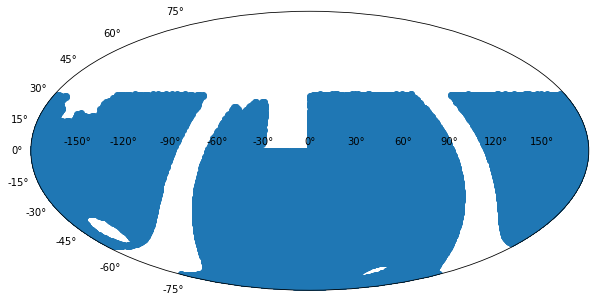

In [9]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

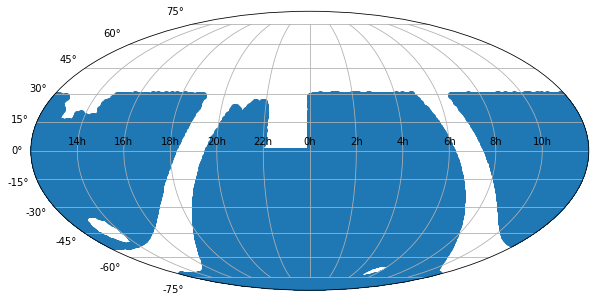

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

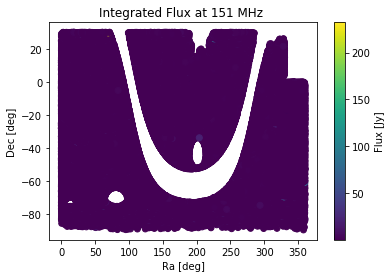

In [11]:
#Integrated flux 151 MHz
plt.title('Integrated Flux at 151 MHz ')
plt.scatter(df2['RAJ2000'],df2['DEJ2000'], c=df2['int_flux_151'])
plt.xlabel('Ra [deg]')
plt.ylabel('Dec [deg]')
plt.colorbar(label ='Flux [Jy]')



$\textbf{Splitting GLEAM Catalogue into Bright and Faint Sources}$


Selection Critiria for bright point source with known position at 151 MHz

$\textit{S}\geq 15$ $\rm{Jy}$, $\delta \textit{S}\leq 1\%$, $\delta \textit{RA}\leq 1\%$ and $\delta \textit{DEC}\leq 1\%$


All other sources are consired fainth, and we will use them to compute the expected sky covariance.





In [16]:
flux = np.array(df2['int_flux_151'])
eflux = np.array(df2['err_int_flux_151'])
index = np.array(df2.index)


In [17]:

brt_src_index =[]
faint_src_index=[]
for src_i in range(flux.size):
    if flux[src_i] >= 15.0  and eflux[src_i] <= 0.1:
        brt_src_index.append(index[src_i])
        
        
    else:
        faint_src_index.append(index[src_i])
        
        


In [18]:
df2.drop(index=faint_src_index,axis=0,inplace=True)

In [19]:
df2.to_csv('GLEAM_Catalogue_flux_above_15Jy_70_237MHz.csv')

$\textit{Interpolation Fluxes using a Power-law function}$

The model of a radio point source flux density from at frequency $\nu$ is given by
\begin{equation}
\textit{S}(\nu) = \textit{S}_0 \Big(\nu/\nu_0\Big)^{-\alpha}
\end{equation}

where $\textit{S}_0$ is the flux density amplitude, $\nu_0$ central frequency and $\alpha$ is spectral index.

In [20]:
#loading the processed GLEAM data.

datafile = pd.read_csv('GLEAM_Catalogue_flux_above_15Jy_70_237MHz.csv')

dfp = pd.DataFrame(data=datafile)



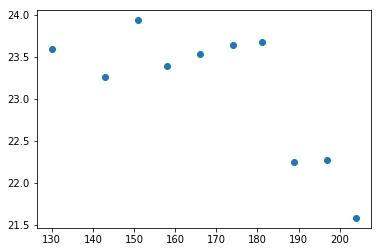

In [97]:
#Selecting flux from 139- 200 MHz

dfp.columns.values[22:41][::2]

flux_func = lambda s_0,f_0,f,alpha : s_0*np.power(f/f_0,-alpha)

flux_data = [flux_func(row_i[j],150e6,freq[j]*10**6,alpha) for j in range(len(row_i))]

f_data = interp1d(freq,flux_data)
print f_data

plt.plot(freq,flux_data,'o')
#plt.legend(['data', 'linear'], loc='best')


In [89]:
freq = np.array([130,143,151,158,166,174,181,189,197,204])
for index, row in dfp.iterrows():
    row_i =np.array(row.values)
    row_i = row_i[22:41][::2]
    alpha = np.array(row)[-2]
    
   




In [85]:
alpha

-0.96565014

In [90]:
row_i

array([27.092985, 24.352652, 23.781641, 22.244131, 21.334164, 20.48072,
       19.750656, 17.803274, 17.116928, 16.039023999999998], dtype=object)